In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFC
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score as acs
from sklearn import datasets
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV
from random import randint
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import accuracy_score as acs
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier as ADA
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        


In [16]:
data = pd.read_csv('Proj1ReorderedRound.csv')
X = data.drop(['Condition'], axis = 1)
Y = data['Condition']

X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

YClass = ['Condition3','Condition4','Normal1']

In [17]:
k = 4

cv = sk(n_splits=k, shuffle=True, random_state=0)

In [18]:
importances = model.feature_importances_ #calculate feature importance

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
#print("indices:", indices)

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]
print("Feature names:", names)

Feature names: ['Material cushion', 'Switch-over volume', 'Injection time', 'Maximum injection pressure', 'Dosage time', 'Cylinder heating zone 3', 'Cylinder heating zone 5', 'Mould temperature control unit 1', 'Cylinder heating zone 4', 'Cylinder heating zone 1', 'Cycle time', 'Cylinder heating zone 2']


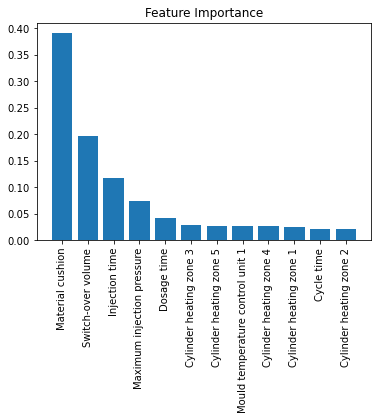

,importance,sum
Material cushion,0.391090,0.391090
Switch-over volume,0.197209,0.588299
Injection time,0.117613,0.705912
Maximum injection pressure,0.074657,0.780569
Dosage time,0.041089,0.821659
Cylinder heating zone 3,0.028981,0.850640
Cylinder heating zone 5,0.027637,0.878277
Mould temperature control unit 1,0.027213,0.905490
Cylinder heating zone 4,0.026219,0.931709
Cylinder heating zone 1,0.024662,0.956370


In [83]:
model = RFC(random_state = 0)

for trainIndex,testIndex in cv.split(X,Y):
    train_X = X.iloc[trainIndex]
    train_Y = Y.iloc[trainIndex]
    model.fit(train_X,train_Y)

imp_DF = pd.DataFrame({'importance':model.feature_importances_}, index = X.columns)
imp_DF = imp_DF.sort_values(by = 'importance',ascending  = False)

Sum = []

for i in range(len(imp_DF.index)):
    Sum.append(imp_DF.iloc[:i+1].sum(axis = 0)[0])
    
imp_DF['sum'] = Sum

plt.figure()

plt.title("Feature Importance")
plt.bar(range(X.shape[1]), imp_DF['importance'])
plt.xticks(range(X.shape[1]), names, rotation=90)

plt.show()
imp_DF

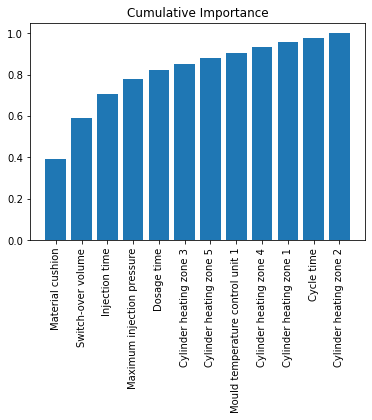

In [84]:
plt.figure()

plt.title("Cumulative Importance")
plt.bar(range(X.shape[1]), imp_DF['sum'])
plt.xticks(range(X.shape[1]), names, rotation=90)

plt.show()

In [85]:
#reorder the feature dataset according to imp_DF then scale

Xreindex = X.reindex(columns = imp_DF.index)
Xs = pd.DataFrame(scale(Xreindex), columns = imp_DF.index)

Xs

,Material cushion,Switch-over volume,Injection time,Maximum injection pressure,Dosage time,Cylinder heating zone 3,Cylinder heating zone 5,Mould temperature control unit 1,Cylinder heating zone 4,Cylinder heating zone 1,Cycle time,Cylinder heating zone 2
0,0.118658,-0.233265,0.091673,-1.011889,0.957220,0.454362,0.175450,0.932801,0.659585,-1.056115,1.129518,0.513500
1,0.135134,-0.966144,0.091673,-1.970667,1.195266,-1.188875,-1.543344,0.684359,1.121690,-1.098903,1.460221,0.623775
2,-0.367024,-0.843998,0.091673,-1.568191,2.169088,-0.052838,-1.134671,-0.890325,-0.342393,0.444051,-0.409796,-1.249677
3,-0.148623,-0.050046,-0.917501,-0.288393,1.628075,-0.387912,0.321151,1.594096,-1.293652,-1.295986,-1.337667,-1.368434
4,-0.422035,0.011028,1.100847,0.627963,1.087063,0.022898,1.052024,1.546599,0.298918,1.368526,1.100968,0.672247
...,...,...,...,...,...,...,...,...,...,...,...,...
126,1.059993,0.992047,-0.513832,0.822963,-0.795660,-0.137754,1.111251,0.560138,0.634789,1.043080,0.589450,0.898855
127,0.534508,0.503461,0.495343,-0.492840,-0.016602,1.434338,-0.223746,-0.411709,0.412754,-0.217215,1.020077,0.066344
128,1.529274,2.152439,-0.513832,-0.646665,0.199803,-1.677715,0.776021,0.351885,0.189591,-1.403604,0.603725,0.449275
129,0.576785,0.686681,0.495343,-1.552327,1.281828,0.430265,0.535556,-0.042699,-0.707568,1.201265,0.353913,1.613820


In [89]:
AccDF = pd.DataFrame(columns = ['number','cumulative importance','C3P','C4P','N1P','Accuracy'])

for i in range(len(imp_DF.index)):
    selectedFeatures = imp_DF.index[:i+1]
    
    Xf = Xs[selectedFeatures]
    
    #+++++++++++++++++++++++ Tuned models ++++++++++++++++++++++++++
    #results for all features for tree based methods (DT,RF,Ada) may defer from previous models
    #due to the split decisions being sensitive to column order (for some reason)

    #model = dt(random_state = 0, max_depth = 4, min_samples_leaf = 3)  
    model = SVC(kernel='rbf',C = 1.73711, gamma = 0.0901)
    #model = RFC(n_estimators = 117, max_samples = 0.87)
    #model = ADA(n_estimators =50, learning_rate=0.1, random_state=0)

    
    
    #> add tuned Adaboost model if it exists <
    #change model from ^here^. use only hyperparameter tuned models

    C3PL = []
    C4PL = []
    N1PL = []

    AL = []

    for trainIndex, testIndex in cv.split(Xf, Y):
    
        train_X = Xf.iloc[trainIndex]
        test_X = Xf.iloc[testIndex]
        train_Y = Y.iloc[trainIndex]
        test_Y = Y.iloc[testIndex]
    
        model.fit(train_X, train_Y.values.ravel())
        pred_Y = model.predict(test_X)
    
        CM = confusion_matrix(test_Y, pred_Y)
    
        C3Pre = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
        C3PL.append(C3Pre)
        C4Pre = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
        C4PL.append(C4Pre)
        N1Pre = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
        N1PL.append(N1Pre)
        
        Acc = acs(test_Y,pred_Y)
        AL.append(Acc)
    
    
    print('\n')
    print('Number of features used = ', i+1)

    print('average C3 Precision = ', np.mean(C3PL).round(4))
    print('average C4 Precision = ' , np.mean(C4PL).round(4))
    print('average N1 Precision = ', np.mean(N1PL).round(4))
    print('average Accuracy = ', np.mean(AL).round(4))
    
    AccDF.loc[i] = [i+1,imp_DF.iloc[i]['sum'],np.mean(C3PL).round(4),np.mean(C4PL).round(4),np.mean(N1PL).round(4),np.mean(AL).round(4)]
    
AccDF

IndexError: index 1 is out of bounds for axis 1 with size 1

Model used : RandomForestClassifier(max_samples=0.87, n_estimators=117)
Average accuracy against number of parameters used


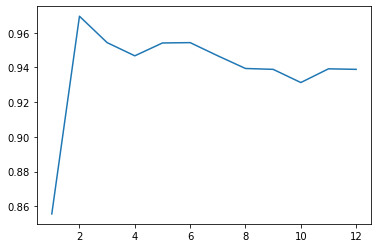

In [87]:
print('Model used :',model)
print('Average accuracy against number of parameters used')
plt.plot(AccDF['number'],AccDF['Accuracy'])

In [90]:
number = 2

selectedFeatures = imp_DF.index[:number]

selectedFeatures

Index(['Material cushion', 'Switch-over volume'], dtype='object')

In [91]:
Xf = X[selectedFeatures]

encoder = preprocessing.LabelEncoder()

Ye = pd.DataFrame(encoder.fit_transform(Y.values.ravel()), columns = ['Condition'])

YeClass = ['0','1','2']